# Importing Libraries 

In [169]:
import sklearn
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
#Importing CSV files containing Train And Test Data
train_data = pd.read_csv("train.csv",index_col = 0)
test_data = pd.read_csv("test.csv",index_col = 0)
print(train_data.head())
print(test_data.head())

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             

# DataSet Information

In [137]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  D

# DataSet Shape

In [138]:
print("Train Dataset Shape = ",train_data.shape)
print("Test DataSet Shape",test_data.shape)

Train Dataset Shape =  (614, 12)
Test DataSet Shape (367, 11)


# Data Cleaning

## Checking for Missing Values

In [139]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling missing values in "LoanAmount" & "Credit_History" by their 'Mean' and 'Median' of the respective variables

In [140]:
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())

In [141]:
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].median())

### Confirming whether the missing values are filled

In [142]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Dropping the remaining missing values

In [143]:
train_data.dropna(inplace = True)
print(train_data.isnull().sum())
print("Shape of the dataset",train_data.shape)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Shape of the dataset (542, 12)


# Exploratory Data Analysis

## Comparison between Parameters in getting the Loan

C:\Users\Jatin Dhall\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jatin Dhall\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jatin Dhall\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jati

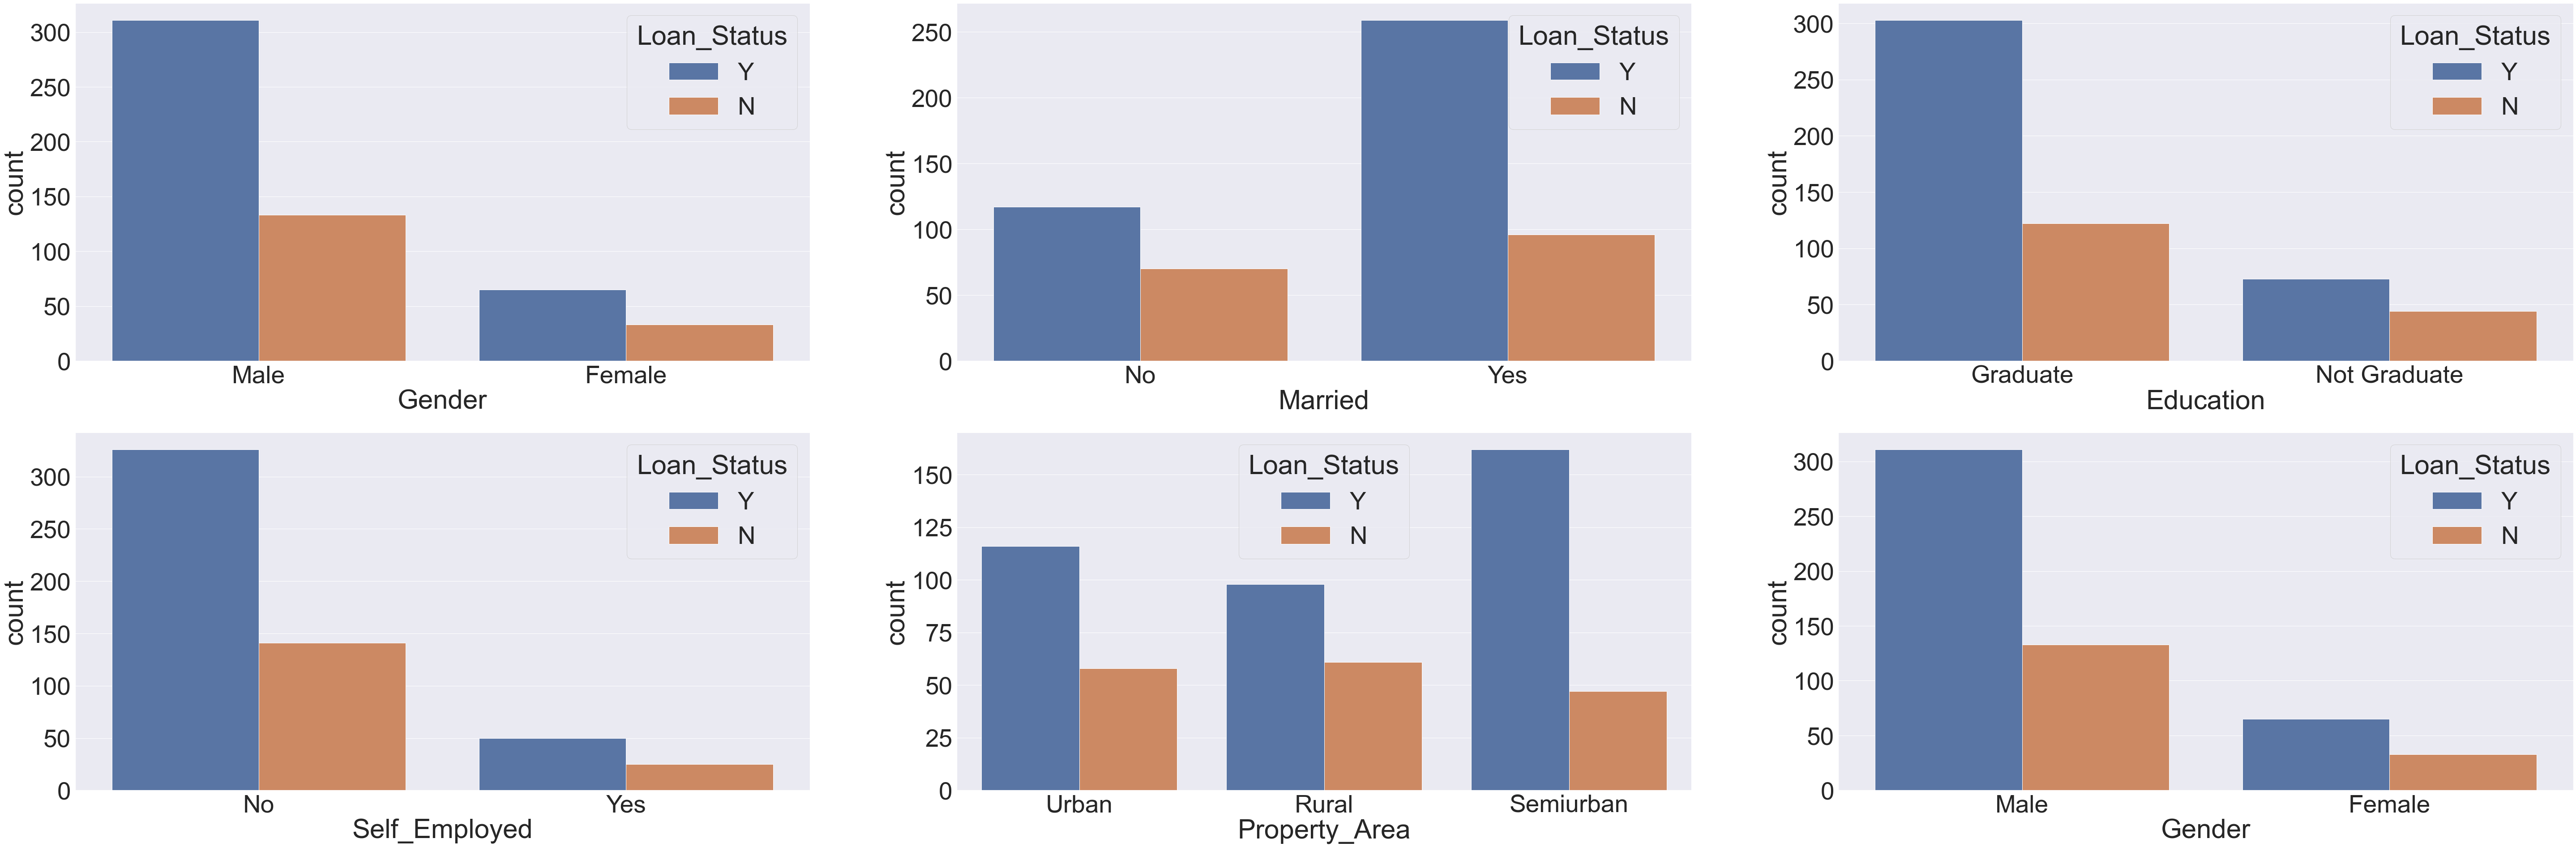

In [144]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(train_data['Gender'],hue = train_data['Loan_Status'])

plt.subplot(332)
sns.countplot(train_data['Married'],hue = train_data['Loan_Status'])

plt.subplot(333)
sns.countplot(train_data['Education'],hue = train_data['Loan_Status'])

plt.subplot(334)
sns.countplot(train_data['Self_Employed'],hue = train_data['Loan_Status'])

plt.subplot(335)
sns.countplot(train_data['Property_Area'],hue = train_data['Loan_Status'])

plt.subplot(336)
sns.countplot(train_data['Gender'],hue = train_data['Loan_Status'])

## Converting Categorical Data to Numerical Data

In [145]:
train_data.Loan_Status = train_data.Loan_Status.map({'Y' : 1, 'N' : 0})

In [146]:
train_data['Loan_Status'].value_counts()
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [147]:
train_data.Gender = train_data.Gender.map({'Male' : 1, 'Female' : 0})
train_data['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [148]:
train_data.Married = train_data.Married.map({'Yes' : 1, 'No' : 0})
train_data['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [149]:
train_data.Dependents = train_data.Dependents.map({'0' : 0, '1' : 1,'2' : 2,'3+' : 3})
train_data['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [150]:
train_data.Education = train_data.Education.map({'Graduate' : 1, 'Not Graduate' : 0})
train_data['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [151]:
train_data.Self_Employed = train_data.Self_Employed.map({'Yes' : 1, 'No' : 0})
train_data['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [152]:
train_data.Property_Area = train_data.Property_Area.map({'Urban' : 2, 'Rural' : 0, 'Semiurban' : 1})
train_data['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

## Displaying the clean Dataset

In [153]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [156]:
train_data.shape

(542, 12)

## Splitting the data into train and test set

In [161]:
x = train_data.iloc[1:542,1:12].values
y = train_data.iloc[1:542,11].values

In [162]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

## Creating a LR model

In [173]:
model = LogisticRegression()
model.fit(x_train,y_train)

lr_prediction = model.predict(x_test)
print("Logistic Regression accuracy = ",metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.9938650306748467


C:\Users\Jatin Dhall\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
